# A Comprehensive Analysis of  SAT Performance by State From 2017 to 2018 

## Problem Statement

<div align="justify">

SAT and ACT are two of the main standardized tests for high schoolers in the United States. Admission to colleges is mostly dependent on the student’s performance in one of these tests. Although most states accept both exams, there are states that exclusively prefer one over the other. This analysis investigates the correlation between SAT participation by state against its total score and the lessons learned from it. This study reviews the SAT data for all 50 states, including District of Columbia, for a period of two years from 2017 to 2018 and highlights the states that the SAT is more popular and why. The findings of this study can help the state college boards, public and private schools, and the students and their families have a better strategy for the SAT exam.

</div>

### Contents:

- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [References](#References)

###  Datasets

There are 10 datasets included in the [`data`](./data/) folder. However, this project only uses the below datasets from [`data`](./data/) and [`Extra_data`](./data/) folders to complete its analysis.


* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`GDP_per_Capita_States.xlsx`](./Extra_data/GDP_per_Capita_States.xlsx): GDP per Capita by State from 2011 to 2018
* [`United_States-_States_Polygon.shp`](./Extra_data/Igismap/United_States-_States_Polygon.shp): US Map

In [1]:
# Import the libraries needed for this study.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib as mpl
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## Data Import and Cleaning

In [2]:
# Display the data
df_2017 = pd.read_csv('../data/sat_2017.csv')
df_2017.loc[:, 'Year'] = '2017'
df_2017.sort_values(by=['State'], ignore_index=True, inplace=True)
df_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Year
0,Alabama,5%,593,572,1165,2017
1,Alaska,38%,547,533,1080,2017
2,Arizona,30%,563,553,1116,2017
3,Arkansas,3%,614,594,1208,2017
4,California,53%,531,524,1055,2017


In [3]:
df_2018 = pd.read_csv('../data/sat_2018.csv')
df_2018.loc[:, 'Year'] = '2018'
df_2018.sort_values(by=['State'], ignore_index=True, inplace=True)
df_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Year
0,Alabama,6%,595,571,1166,2018
1,Alaska,43%,562,544,1106,2018
2,Arizona,29%,577,572,1149,2018
3,Arkansas,5%,592,576,1169,2018
4,California,60%,540,536,1076,2018


In [4]:
df_extra = pd.read_excel('../Extra_data/GDP_per_Capita_States.xlsx')
df_extra = df_extra[['State', 2017, 2018]]
df_extra.columns = df_extra.columns.astype(str)
df_extra.sort_values(by=['State'], ignore_index=True, inplace=True)
df_extra.head()

,State,2017,2018
0,Alabama,36856,37261
1,Alaska,67705,63971
2,Arizona,38414,38590
3,Arkansas,36196,36368
4,California,57328,58619


In [5]:
# Add the 2017, 2018 GDP_per_Capita to df_2017 and df_2018 datasets
df_2017['GDP_per_Capita'] = df_extra['2017']
df_2018['GDP_per_Capita'] = df_extra['2018']

In [6]:
# Merge the 2017 and 2018 datasets into a single dataset called df
frames = [df_2017, df_2018]
df = pd.concat(frames, ignore_index=True)
df.reset_index(inplace=True, drop=True)
print('Final Dataset rows:', df.shape[0], ', columns:', df.shape[1])
df.head()

Final Dataset rows: 102 , columns: 7


,State,Participation,Evidence-Based Reading and Writing,Math,Total,Year,GDP_per_Capita
0,Alabama,5%,593,572,1165,2017,36856
1,Alaska,38%,547,533,1080,2017,67705
2,Arizona,30%,563,553,1116,2017,38414
3,Arkansas,3%,614,594,1208,2017,36196
4,California,53%,531,524,1055,2017,57328


In [7]:
# Check for missing values
df.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
Year                                  0
GDP_per_Capita                        0
dtype: int64

In [8]:
# Check for any obvious issues 
df.min()

State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        480
Math                                       52
Total                                     950
Year                                     2017
GDP_per_Capita                          31633
dtype: object

In [9]:
# report max values for each column
df.max()

State                                 Wyoming
Participation                             99%
Evidence-Based Reading and Writing        644
Math                                      655
Total                                    1298
Year                                     2018
GDP_per_Capita                         160472
dtype: object

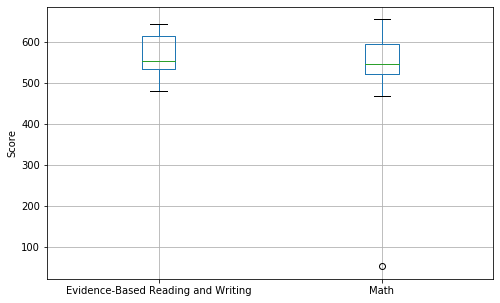

In [10]:
# Use boxplot to look for outliers
plt.figure(figsize=(8,5))
df.boxplot(column=['Evidence-Based Reading and Writing', 'Math']);
plt.ylabel('Score')
plt.show()

In [11]:
# Visualize the Math scores below 200
df[df['Math']<200]

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Year,GDP_per_Capita
20,Maryland,69%,536,52,1060,2017,54894


In [12]:
# Check if Values in Total column is equal to summation of Math and Evidence-Based Reading and Writing.
df['Subtract'] = df.apply(lambda x: x['Total'] - x['Math'] - x['Evidence-Based Reading and Writing'], axis=1)
df[df['Subtract']!=0]['Subtract'].value_counts()

 1      17
-1       7
 472     1
Name: Subtract, dtype: int64

**Findings:**
- There are no missing values in the dataset.
- After reviewing the data, these are the errors in data: 
    1. the min. value for Math column is wrong since the min. of each SAT section is 200. It Seems that 52 is a typo.
        - Solution: I substituted  52 with 524, which is equal to 'Total' value (1060) - 'Evidence-Based Reading and Writing' value (536)
    2. The sum of Math and Evidence-Based Reading and Writing columns for 24 rows are one point short than the Total column.
        - Solution: The Total column values for these rows are being replaced by the sum of Math and Evidence-Based Reading and Writing columns.      


In [13]:
# Fix any errors identified 
indx = df[df['Math']==52]['Math'].index[0]
df.loc[indx, 'Math'] = df.loc[indx, 'Total'] - df.loc[indx, 'Evidence-Based Reading and Writing'] 
df.iloc[[indx]]

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Year,GDP_per_Capita,Subtract
20,Maryland,69%,536,524,1060,2017,54894,472


In [14]:
df.loc[df.index[df['Subtract']==1].tolist(), 'Total'] = df.loc[df.index[df['Subtract']==1].tolist(), 'Math'] + \
df.loc[df.index[df['Subtract']==1].tolist(), 'Evidence-Based Reading and Writing']

df.loc[df.index[df['Subtract']==-1].tolist(), 'Total'] = df.loc[df.index[df['Subtract']==-1].tolist(), 'Math'] + \
df.loc[df.index[df['Subtract']==-1].tolist(), 'Evidence-Based Reading and Writing']

In [15]:
df.drop(columns=['Subtract'], inplace=True)

In [16]:
df.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Year,GDP_per_Capita
0,Alabama,5%,593,572,1165,2017,36856
1,Alaska,38%,547,533,1080,2017,67705
2,Arizona,30%,563,553,1116,2017,38414
3,Arkansas,3%,614,594,1208,2017,36196
4,California,53%,531,524,1055,2017,57328


In [17]:
# Display the data types of each feature
df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
Year                                  object
GDP_per_Capita                         int64
dtype: object

In [18]:
# Fix any incorrect data types 
def decimal(string):
    return float(string.split('%')[0])/100
df['Participation'] = df['Participation'].map(decimal)

In [19]:
df.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
Year                                   object
GDP_per_Capita                          int64
dtype: object

In [20]:
# Rename Column
col_name = {'State':'state', 'Participation':'participation', \
            'Evidence-Based Reading and Writing':'reading_and_writing', 'Math':'math', \
            'Total':'total', 'Year':'year', 'GDP_per_Capita':'gdp_per_capita'}
df.rename(columns=col_name, inplace=True)
df.head()

,state,participation,reading_and_writing,math,total,year,gdp_per_capita
0,Alabama,0.05,593,572,1165,2017,36856
1,Alaska,0.38,547,533,1080,2017,67705
2,Arizona,0.30,563,553,1116,2017,38414
3,Arkansas,0.03,614,594,1208,2017,36196
4,California,0.53,531,524,1055,2017,57328


**Findings:**
- There is no read to drop any rows since all the rows are being inspected, cleaned, and updated.

In [21]:
# Save cleaned and merged dataframes as csv files
df.to_csv('../data/cleaned_SAT_2017_2018.csv', index=False);

### Data Dictionary

Before starting any expletory analysis, below shows the data frame structure in this study.

|Feature|Type|Dataset|Description|
|:---:|:---:|:---:|:---|
|state|object|SAT|This represents the state where the test was taken. DC is also included in the dataset, although DC is not a state yet!| 
|participation|float|SAT|This shows the normalized participation. It ranges from 0 to 1. 0 indicates nobody took the exam and 1 indicates full participation of qualified candidates. | 
|reading_and_writing|int|SAT|This sums up the scores of reading and writing sections.| 
|math|int|SAT|This indicates the math score.| 
|total|int|SAT|This indicates the total exam score, which is the sum of math, reading and writing scores.| 
|year|object|SAT|This shows which year the exam is taken.| 
|gdp_per_capita|int|SAT|This highlights the GDP per Capita of the state the exam was taken in the given year.| 


## Exploratory Data Analysis

The following steps explore the data in details and aim for finding trends or interesting information. 

In [22]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
participation,102.0,0.427745,0.362527,0.02,0.04,0.455,0.7,1.0
reading_and_writing,102.0,566.401961,46.442823,480.00,534.25,554.500,613.5,644.0
math,102.0,556.558824,47.213770,468.00,523.00,545.500,595.0,655.0
total,102.0,1122.960784,92.929221,950.00,1055.25,1099.000,1209.5,1298.0
gdp_per_capita,102.0,50522.156863,17846.528249,31633.00,42833.50,47192.000,54017.0,160472.0


**Findings:**
- The national average SAT participation, 2017 and 2018 combined, is 43%, which might indicate that ACT is more popular for those two years.
- The maximum participations are in the states that require the SAT.
- The average score is as high as 1123.
- The data suggests that students perform slightly better in reading and writing over math.

In [24]:
# apply the standard deviation function to each numeric column in the dataframe
def mean(lst):
    return sum(lst)/len(lst)

def stdv(lst):
    val = 0
    mean_lst = mean(lst)
    for item in lst:
        val += (item-mean_lst)**2
    val /= (len(lst)-1)
    val = val**0.5
    return val


stdv(df['math'])
{item:stdv(df[item]) for item in df.columns.tolist() if df[item].dtypes!='object'}

{'participation': 0.3625266309446102,
 'reading_and_writing': 46.44282331750964,
 'math': 47.21376991820651,
 'total': 92.92922054478844,
 'gdp_per_capita': 17846.528249197603}

In [25]:
# Which states have the lowest participation rates for the SAT 2017?
df_pp_2017 = df[(df['year']=='2017')]
df_pp_2017[(df_pp_2017['participation']==df_pp_2017['participation'].min())]

,state,participation,reading_and_writing,math,total,year,gdp_per_capita
15,Iowa,0.02,641,635,1276,2017,50086
24,Mississippi,0.02,634,607,1241,2017,31633
34,North Dakota,0.02,635,621,1256,2017,67305


**Findings:**
- The lowest participations are in the states that either offer ACT for free or require ACT for graduation. 

In [26]:
# Which states have the highest participation rates for the SAT 2017?
df_pp_2017[(df_pp_2017['participation']==df_pp_2017['participation'].max())]

,state,participation,reading_and_writing,math,total,year,gdp_per_capita
6,Connecticut,1.0,530,512,1042,2017,63747
7,Delaware,1.0,503,492,995,2017,64040
8,District of Columbia,1.0,482,468,950,2017,159227
22,Michigan,1.0,509,495,1004,2017,42631


**Findings:**
- The states that require SAT for graduation see the highest participation.
- The scores in these states are lower than the national average.

In [27]:
# Which states have the lowest participation rates for the SAT 2018?
df_pp_2018 = df[(df['year']=='2018')]
df_pp_2018[(df_pp_2018['participation']==df_pp_2018['participation'].min())]

,state,participation,reading_and_writing,math,total,year,gdp_per_capita
85,North Dakota,0.02,640,643,1283,2018,62837


**Findings:**
- The lowest participation in 2018 is North Dakota where the state requires ACT for graduation.
- North Dakota scores 163 points higher than national average.

In [28]:
# Which states have the highest participation rates for the SAT 2018?
df_pp_2018[(df_pp_2018['participation']==df_pp_2018['participation'].max())]

,state,participation,reading_and_writing,math,total,year,gdp_per_capita
56,Colorado,1.0,519,506,1025,2018,52795
57,Connecticut,1.0,535,519,1054,2018,64511
58,Delaware,1.0,505,492,997,2018,63664
63,Idaho,1.0,508,493,1001,2018,35466
73,Michigan,1.0,511,499,1010,2018,43372


**Findings:**
- Most of the states that require SAT for graduation see the highest turnout.
- The total scores in these states are lower than the national average.

In [29]:
# Which states have the lowest mean total scores for the SAT 2017?
df_pp_2017[(df_pp_2017['total']==df_pp_2017['total'].min())]

,state,participation,reading_and_writing,math,total,year,gdp_per_capita
8,District of Columbia,1.0,482,468,950,2017,159227


In [30]:
# Which states have the lowest mean total scores for the SAT 2018?
df_pp_2018[(df_pp_2018['total']==df_pp_2018['total'].min())]

,state,participation,reading_and_writing,math,total,year,gdp_per_capita
59,District of Columbia,0.92,497,480,977,2018,160472


**Findings:**
- Washington, D.C., does not exclusively require the SAT, but it covers its cost since 2013. 
- The scores in DC are substantially lower than national average. This is correlated to the higher than national average participation.

In [31]:
# Which states have the highest mean total scores for the SAT 2017?
df_pp_2017[(df_pp_2017['total']==df_pp_2017['total'].max())]

,state,participation,reading_and_writing,math,total,year,gdp_per_capita
23,Minnesota,0.03,644,651,1295,2017,53380


In [32]:
# Which states have the highest mean total scores for the SAT 2018?
df_pp_2018[(df_pp_2018['total']==df_pp_2018['total'].max())]

,state,participation,reading_and_writing,math,total,year,gdp_per_capita
74,Minnesota,0.04,643,655,1298,2018,53704


**Findings:**
- Minnesota scores the highest in SAT; however, it also has one of the lowest participation rates in the nation. This indicates that only students who are confident and more prepared takes the SAT in this state. Historically, these students scores above the national average.

In [33]:
# Which state has the lowest drop in participation from 2017 to 2018
drop = (df_pp_2018['participation'].reset_index(drop=True) - df_pp_2017['participation'].reset_index(drop=True)).tolist()
ind = np.argmin(np.array(drop))
details = {'state':[df_pp_2018.loc[ind+51, 'state']], 'participation_2017':[df_pp_2017.loc[ind, 'participation']], \
          'participation_2018':[df_pp_2018.loc[ind+51, 'participation']], 'dop': [round(abs(drop[ind]),3)]}
df_drop_participation = pd.DataFrame(details)
df_drop_participation

,state,participation_2017,participation_2018,dop
0,Florida,0.83,0.56,0.27


**Findings:**

- Florida students in 2017 took the SAT in greater because of free test sessions offered at their schools [(read this article for more information).](https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html)

In [34]:
# Which state has the highest increase in participation from 2017 to 2018
increase = (df_pp_2018['participation'].reset_index(drop=True) - df_pp_2017['participation'].reset_index(drop=True)).tolist()
ind = np.argmax(np.array(drop))
details = {'state':[df_pp_2018.loc[ind+51, 'state']], 'participation_2017':[df_pp_2017.loc[ind, 'participation']], \
          'participation_2018':[df_pp_2018.loc[ind+51, 'participation']], 'increase': [round(abs(increase[ind]),3)]}
df_incrs_participation = pd.DataFrame(details)
df_incrs_participation

,state,participation_2017,participation_2018,increase
0,Illinois,0.09,0.99,0.9


**Findings:** 
- The substantial increase in the SAT participation for the state of Illinois is dependent on a decision took by the Illinois College Board in 2016-2017. The college board made SAT exam mandatory  for all the Illinois high schoolers. This led to a big jump in the SAT participation in 2017-2018 school year [(read this article for more information).](https://www.testive.com/illinois/)




In [35]:
# How many states do have participation of >50% and score >1100 in SAT in both years?
lst_2018 = df_pp_2018[(df_pp_2018['participation']> 0.5) & (df_pp_2018['total']> 1100)]['state'].tolist()
lst_2017 = df_pp_2017[(df_pp_2017['participation']> 0.5) & (df_pp_2017['total']> 1100)]['state'].tolist()
state_score_lst = list(set(lst_2018) & set(lst_2017))

details = {'state':list(set(lst_2018) & set(lst_2017)), \
           'participation_2017':df_pp_2017[(df_pp_2017['participation']> 0.5) & \
                                           (df_pp_2017['state'].isin(state_score_lst))]['participation'].tolist(), \
           'participation_2018':df_pp_2018[(df_pp_2018['participation']> 0.5) & \
                                           (df_pp_2018['state'].isin(state_score_lst))]['participation'].tolist(), \
           'total_2017':df_pp_2017[(df_pp_2017['participation']> 0.5) & \
                                           (df_pp_2017['state'].isin(state_score_lst))]['total'].tolist(), \
           'total_2018':df_pp_2018[(df_pp_2018['participation']> 0.5) & \
                                           (df_pp_2018['state'].isin(state_score_lst))]['total'].tolist(), \
           'gdp_per_capita_2017':df_pp_2017[(df_pp_2017['participation']> 0.5) & \
                                           (df_pp_2017['state'].isin(state_score_lst))]['gdp_per_capita'].tolist(), \
           'gdp_per_capita_2018':df_pp_2018[(df_pp_2018['participation']> 0.5) & \
                                           (df_pp_2018['state'].isin(state_score_lst))]['gdp_per_capita'].tolist()}


df_score_participation = pd.DataFrame(details)
df_score_participation

,state,participation_2017,participation_2018,total_2017,total_2018,gdp_per_capita_2017,gdp_per_capita_2018
0,Virginia,0.76,0.80,1106,1125,64507,65545
1,Massachusetts,0.60,0.64,1113,1119,43495,43946
2,Vermont,0.65,0.68,1102,1117,51716,51736


**Findings:**
- Historically, SAT is more popular in New England [read this article for more information.](https://www.thoughtco.com/sat-scores-four-year-vermont-colleges-788768)

In [36]:
# Conduct t-test of SAT total scores for states that offer SAT for free against the states that offer ACT for free
# Note: states that offer both exams for free are excluded from this analysis
SAT_Free = [ 'Connecticut', 'Delaware', 'Idaho' , 'Illinois', 'Maine' , 'Michigan', 'New Hampshire']

ACT_Free = ['Arkansas', 'Alabama', 'Hawaii', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', \
            'Montana', 'Nevada', 'North Carolina', 'Utah', 'Wisconsin', 'Wyoming']


my_dict_total_2018 = {'Free SAT (2018)': df[(df['year']=='2018') & (df['state'].isin(SAT_Free))]['total'], \
                         'Free ACT (2018)': df[(df['year']=='2018') & (df['state'].isin(ACT_Free))]['total']}

my_dict_gdp_2018 = {'Free SAT (2018)': df[(df['year']=='2018') & (df['state'].isin(SAT_Free))]['gdp_per_capita'], \
                         'Free ACT (2018)': df[(df['year']=='2018') & (df['state'].isin(ACT_Free))]['gdp_per_capita']}

my_dict_participation_2018 = {'Free SAT (2018)': df[(df['year']=='2018') & (df['state'].isin(SAT_Free))]['participation'], \
                         'Free ACT (2018)': df[(df['year']=='2018') & (df['state'].isin(ACT_Free))]['participation']}



#print(my_dict_total_2017['Free SAT (2017)'].var())
#print(my_dict_total_2018['Free SAT (2018)'].var())
print('p-value (total score hypothesis):', stats.ttest_ind(my_dict_total_2018['Free SAT (2018)'], \
                                 my_dict_total_2018['Free ACT (2018)'], equal_var=False)[1])

print('p-value (participation hypothesis):', stats.ttest_ind(my_dict_participation_2018['Free SAT (2018)'], \
                                 my_dict_participation_2018['Free ACT (2018)'], equal_var=False)[1])

print('p-value (GDP per Capita hypothesis):', stats.ttest_ind(my_dict_gdp_2018['Free SAT (2018)'], \
                                 my_dict_gdp_2018['Free ACT (2018)'], equal_var=False)[1])



p-value (total score hypothesis): 4.437895049480551e-05
p-value (participation hypothesis): 1.0506300280763165e-09
p-value (GDP per Capita hypothesis): 0.17245976701040178


**Findings:**
- This analysis indicates that there is a statistically significant in the SAT scores for states that offer the exam for free against the SAT scores in the states that offer ACT for free. 
- The students who take the SAT in the states that most of its students take ACT perform better in SAT exam because only students who are confident and more prepared take the SAT in these states.
- A state mandate to take the SAT in conjunction with the level of student preparedness have significant impact on state average score.
- GDP per Capita by state has no statistically significant effect on the SAT scores.

## Data Visualization

This studys uses Seaborn and Matplotlib libraries to visualize correlations between the different variables in this study.  

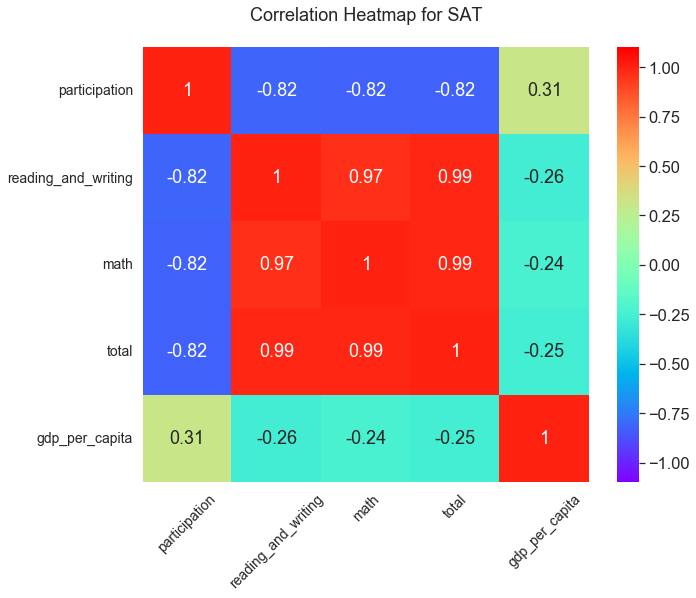

In [39]:
# Heat map
fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
corr = df.corr()
ax = sns.heatmap(corr,annot=True,cmap="rainbow", center=0,  vmax=1.1, vmin=-1.1)
ax.set_title('Correlation Heatmap for SAT\n', fontsize=18)
bottom, top = ax.get_ylim()
plt.yticks(rotation = 0, fontsize=14)
plt.xticks(rotation = 45, fontsize=14)
ax.set_ylim(bottom + 0.5, top - 0.5);

**Findings:**
- Participation has a strong negative correlation with scores.
- GDP per Capita doesn’t have a strong effect on exam scores or participation.

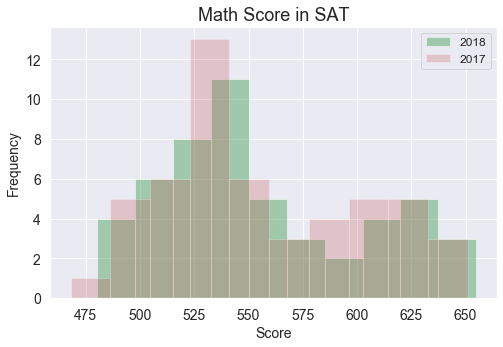

In [40]:
# Histogram plot of math scores in 2017 and 2018
fig = plt.figure(figsize=(8,5))
df[df['year']=='2018']['math'].hist(bins = 10, color = 'g', \
           alpha = 0.5, legend=True)
df[df['year']=='2017']['math'].hist(bins = 10, color = 'r', \
            alpha = 0.25, legend=True)

plt.title("Math Score in SAT", fontsize=18)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend(['2018', '2017'], fontsize=12);

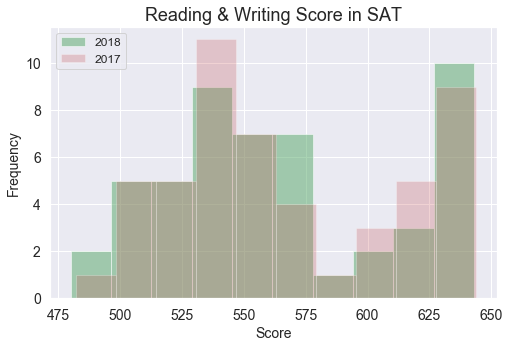

In [41]:
# Histogram plot of reading and writing scores in 2017 and 2018
fig = plt.figure(figsize=(8,5))
df[df['year']=='2018']['reading_and_writing'].hist(bins = 10, color = 'g', \
           alpha = 0.5, legend=True)
df[df['year']=='2017']['reading_and_writing'].hist(bins = 10, color = 'r', \
            alpha = 0.25, legend=True)

plt.title("Reading & Writing Score in SAT", fontsize=18)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend(['2018', '2017'], fontsize=12);

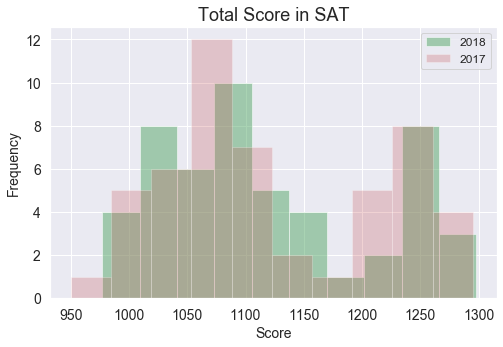

In [42]:
# Histogram plot of total scores in 2017 and 2018
fig = plt.figure(figsize=(8,5))
df[df['year']=='2018']['total'].hist(bins = 10, color = 'g', \
           alpha = 0.5, legend=True)
df[df['year']=='2017']['total'].hist(bins = 10, color = 'r', \
            alpha = 0.25, legend=True)

plt.title("Total Score in SAT", fontsize=18)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend(['2018', '2017'], fontsize=12);

**Findings:**
- The Distribution is bimodal. This is because of substantial difference in exam participation. The peak on the right is for the states with low participation and high scores.

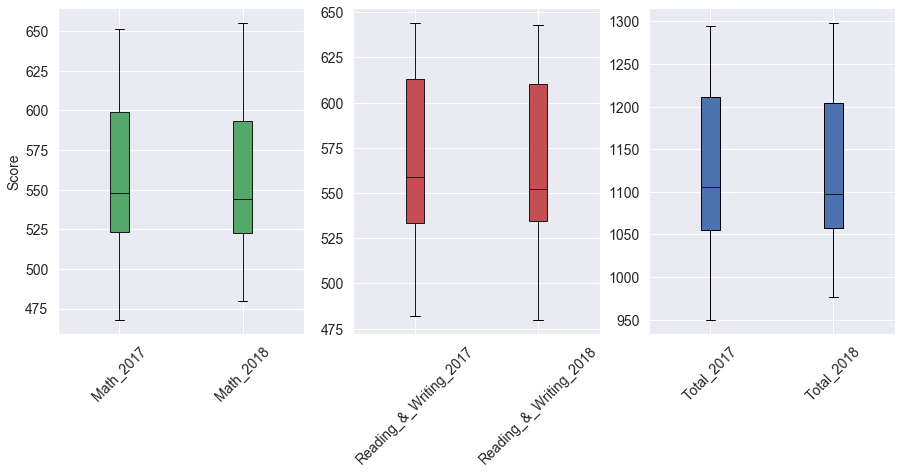

In [43]:
# Boxplots of average scores in all states 
my_dict_math = {'Math_2017': df[df['year']=='2017']['math'], 'Math_2018': df[df['year']=='2018']['math']}
my_dict_rw = {'Reading_&_Writing_2017': df[df['year']=='2017']['reading_and_writing'], 'Reading_&_Writing_2018': df[df['year']=='2018']['reading_and_writing']}
my_dict_total = {'Total_2017': df[df['year']=='2017']['total'], 'Total_2018': df[df['year']=='2018']['total']}


fig, axs = plt.subplots(1, 3)
axs[0].boxplot(my_dict_math.values(), vert=True, patch_artist=True, boxprops=dict(facecolor='g', color='k'), \
              whiskerprops=dict(color='k'), medianprops=dict(color='k'))
axs[0].set_xticklabels(my_dict_math.keys(), fontsize=14)
axs[0].set_ylabel("Score", fontsize=14);
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].tick_params(axis='y', labelsize=14)

axs[1].boxplot(my_dict_rw.values(), vert=True, patch_artist=True, boxprops=dict(facecolor='r', color='k'), \
              whiskerprops=dict(color='k'), medianprops=dict(color='k'))
axs[1].set_xticklabels(my_dict_rw.keys(), fontsize=14)
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].tick_params(axis='y', labelsize=14)

axs[2].boxplot(my_dict_total.values(), vert=True, patch_artist=True, medianprops=dict(color='k'))
axs[2].set_xticklabels(my_dict_total.keys(), fontsize=14)
axs[2].tick_params(axis='x', labelrotation=45)
axs[2].tick_params(axis='y', labelsize=14)

fig.set_figheight(6)
fig.set_figwidth(15)

**Findings:**
- The max scores in math and total are slightly higher in 2018 than 2017.
- The min scores in math and total are slightly higher in 2018 than 2017.
- The national mean score is lower in 2018 than 2017.


In [44]:
# Conduct t-test of SAT total scores for states that offer SAT for free against the states that offer ACT for free
# Note: states that offer both exams for free are excluded from this analysis

SAT_Free = [ 'Connecticut', 'Delaware', 'Idaho' , 'Illinois', 'Maine' , 'Michigan', 'New Hampshire']

ACT_Free = ['Arkansas', 'Alabama', 'Hawaii', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', \
            'Montana', 'Nevada', 'North Carolina', 'Utah', 'Wisconsin', 'Wyoming']

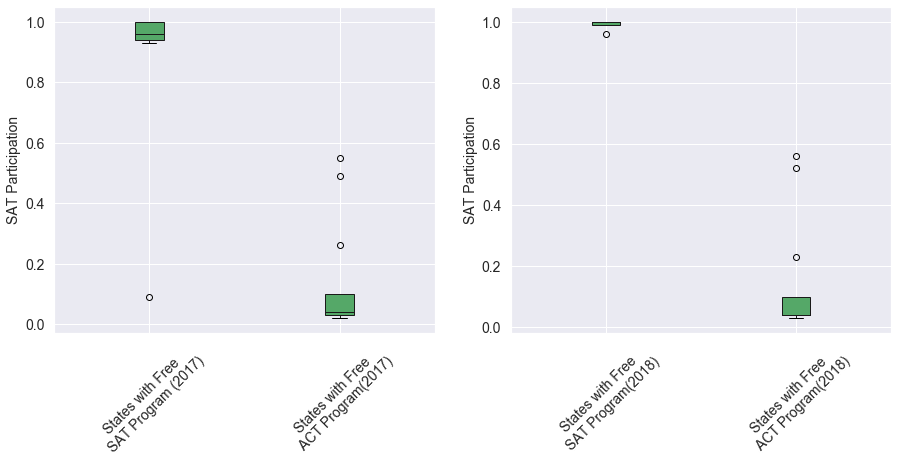

In [45]:
# Boxplot of total scores for states that offer SAT for free against the states that offer ACT for free
# Note: states that offer both exams for free are excluded from this analysis
my_dict_participation_2017 = {'States with Free \n SAT Program (2017)': df[(df['year']=='2017') & (df['state'].isin(SAT_Free))]['participation'], \
                         'States with Free \n ACT Program(2017)': df[(df['year']=='2017') & (df['state'].isin(ACT_Free))]['participation']}

my_dict_participation_2018 = {'States with Free \n SAT Program(2018)': df[(df['year']=='2018') & (df['state'].isin(SAT_Free))]['participation'], \
                         'States with Free \n ACT Program(2018)': df[(df['year']=='2018') & (df['state'].isin(ACT_Free))]['participation']}



fig, axs = plt.subplots(1,2)
axs[0].boxplot(my_dict_participation_2017.values(), vert=True, patch_artist=True, boxprops=dict(facecolor='g', color='k'), \
              whiskerprops=dict(color='k'), medianprops=dict(color='k'))
axs[0].set_xticklabels(my_dict_participation_2017.keys(), fontsize=14)
axs[0].set_ylabel("SAT Participation", fontsize=14);
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].tick_params(axis='y', labelsize=14)


axs[1].boxplot(my_dict_participation_2018.values(), vert=True, patch_artist=True, boxprops=dict(facecolor='g', color='k'), \
              whiskerprops=dict(color='k'), medianprops=dict(color='k'))
axs[1].set_xticklabels(my_dict_participation_2018.keys(), fontsize=14)
axs[1].set_ylabel("SAT Participation", fontsize=14);
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].tick_params(axis='y', labelsize=14)

fig.set_figheight(6)
fig.set_figwidth(15);

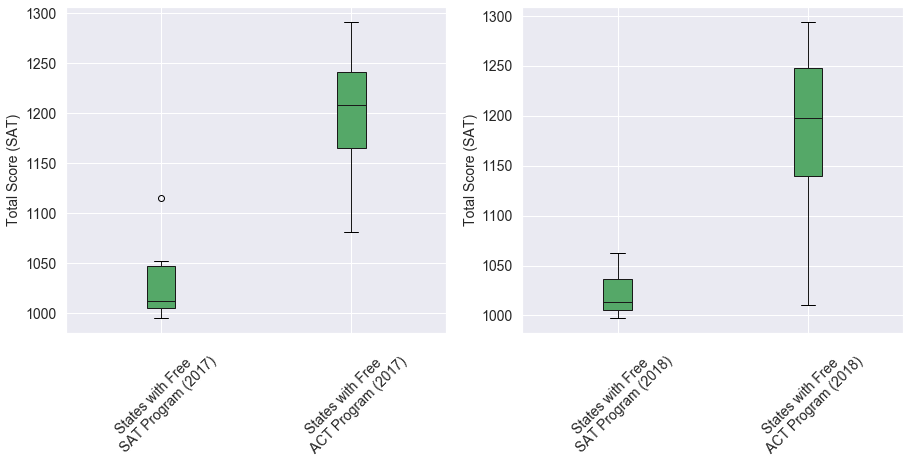

In [46]:
my_dict_total_2017 = {'States with Free \n SAT Program (2017)': df[(df['year']=='2017') & (df['state'].isin(SAT_Free))]['total'], \
                         'States with Free \n ACT Program (2017)': df[(df['year']=='2017') & (df['state'].isin(ACT_Free))]['total']}

my_dict_total_2018 = {'States with Free \n SAT Program (2018)': df[(df['year']=='2018') & (df['state'].isin(SAT_Free))]['total'], \
                         'States with Free \n ACT Program (2018)': df[(df['year']=='2018') & (df['state'].isin(ACT_Free))]['total']}


fig, axs = plt.subplots(1,2)
axs[0].boxplot(my_dict_total_2017.values(), vert=True, patch_artist=True, boxprops=dict(facecolor='g', color='k'), \
              whiskerprops=dict(color='k'), medianprops=dict(color='k'))
axs[0].set_xticklabels(my_dict_total_2017.keys(), fontsize=14)
axs[0].set_ylabel("Total Score (SAT)", fontsize=14);
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].tick_params(axis='y', labelsize=14)

axs[1].boxplot(my_dict_total_2018.values(), vert=True, patch_artist=True, boxprops=dict(facecolor='g', color='k'), \
              whiskerprops=dict(color='k'), medianprops=dict(color='k'))
axs[1].set_xticklabels(my_dict_total_2018.keys(), fontsize=14)
axs[1].set_ylabel("Total Score (SAT)", fontsize=14);
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].tick_params(axis='y', labelsize=14)


fig.set_figheight(6)
fig.set_figwidth(15);

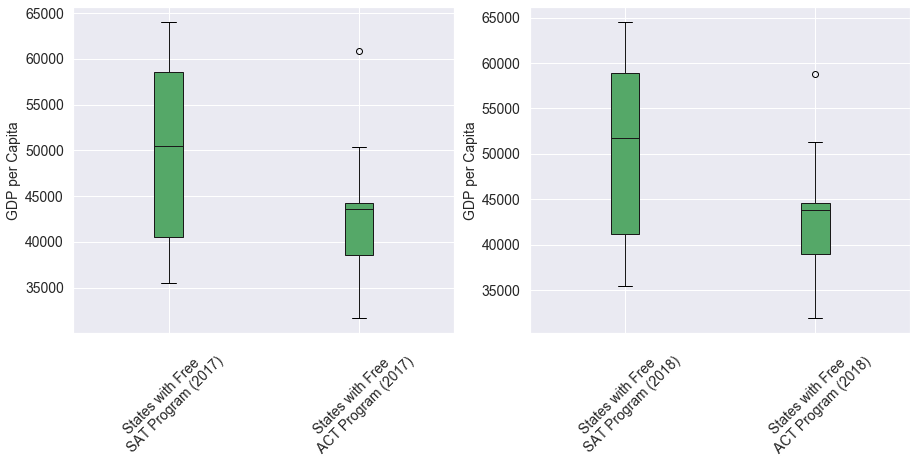

In [47]:
my_dict_gdp_2017 = {'States with Free \n SAT Program (2017)': df[(df['year']=='2017') & (df['state'].isin(SAT_Free))]['gdp_per_capita'], \
                         'States with Free \n ACT Program (2017)': df[(df['year']=='2017') & (df['state'].isin(ACT_Free))]['gdp_per_capita']}

my_dict_gdp_2018 = {'States with Free \n SAT Program (2018)': df[(df['year']=='2018') & (df['state'].isin(SAT_Free))]['gdp_per_capita'], \
                         'States with Free \n ACT Program (2018)': df[(df['year']=='2018') & (df['state'].isin(ACT_Free))]['gdp_per_capita']}


fig, axs = plt.subplots(1,2)
axs[0].boxplot(my_dict_gdp_2017.values(), vert=True, patch_artist=True, boxprops=dict(facecolor='g', color='k'), \
              whiskerprops=dict(color='k'), medianprops=dict(color='k'))
axs[0].set_xticklabels(my_dict_gdp_2017.keys(), fontsize=14)
axs[0].set_ylabel("GDP per Capita", fontsize=14);
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].tick_params(axis='y', labelsize=14)

axs[1].boxplot(my_dict_gdp_2018.values(), vert=True, patch_artist=True, boxprops=dict(facecolor='g', color='k'), \
              whiskerprops=dict(color='k'), medianprops=dict(color='k'))
axs[1].set_xticklabels(my_dict_gdp_2018.keys(), fontsize=14)
axs[1].set_ylabel("GDP per Capita", fontsize=14);
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].tick_params(axis='y', labelsize=14)


fig.set_figheight(6)
fig.set_figwidth(15);

**Findings:**
- Participation has a strong negative correlation with score. 
- The students who take SAT in states where most students prefer ACT substantially perform better in the SAT. This is because these students are more confident and prepared, which translates to higher scores.
- State mandate  for the SAT and student preparedness are main contributors to a state average SAT score.
- GDP per Capita by state has no statistically significant effect on the SAT scores.

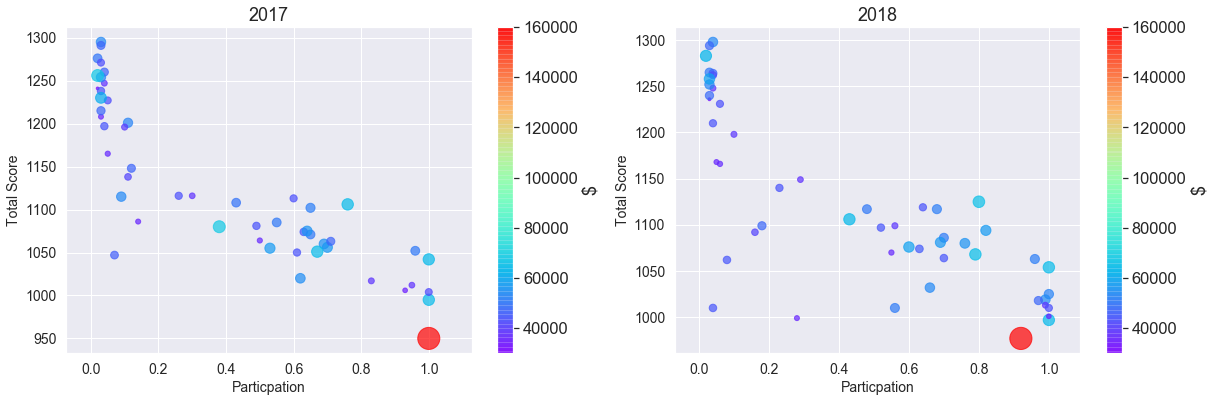

In [48]:
# Scatter plot of total scores vs. participation.
# The size of the circles represent the state GDP per Capita
# Data includes all the 50 states, plus DC.

gdp_min = (df['gdp_per_capita'].min())-2000
gdp_max = (df['gdp_per_capita'].max())+2000

size_2017 = df[df['year']=='2017']['gdp_per_capita'].tolist()
size_2017 = [(val-gdp_min)/(gdp_max-gdp_min)*500 for val in size_2017]

size_2018 = df[df['year']=='2018']['gdp_per_capita'].tolist()
size_2018 = [(val-gdp_min)/(gdp_max-gdp_min)*500 for val in size_2018]

cm = plt.cm.get_cmap('rainbow')
fig, axs = plt.subplots(1, 2)
sc0 = axs[0].scatter(df[df['year']=='2017']['participation'].tolist(), df[df['year']=='2017']['total'].tolist(), \
               c = df[df['year']=='2017']['gdp_per_capita'], linewidths = 1, s = size_2017, alpha=.7, cmap=cm, \
               vmin = 30000, vmax =160000)

axs[0].set_xlabel("Particpation", fontsize=14)
axs[0].set_ylabel("Total Score", fontsize=14)
axs[0].set_title('2017', fontsize=18)
axs[0].tick_params(axis='x', labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)
fig.colorbar(sc0, ax=axs[0], label = '$')

sc1 = axs[1].scatter(df[df['year']=='2018']['participation'].tolist(), df[df['year']=='2018']['total'].tolist(), \
               c = df[df['year']=='2018']['gdp_per_capita'], linewidths = 1, s = size_2018, alpha=.7, cmap=cm, \
               vmin = 30000, vmax =160000)

axs[1].set_xlabel("Particpation", fontsize=14)
axs[1].set_ylabel("Total Score", fontsize=14)
axs[1].set_title('2018', fontsize=18)
axs[1].tick_params(axis='x', labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)
fig.colorbar(sc1, ax=axs[1], label = '$')


fig.set_figheight(6)
fig.set_figwidth(20)

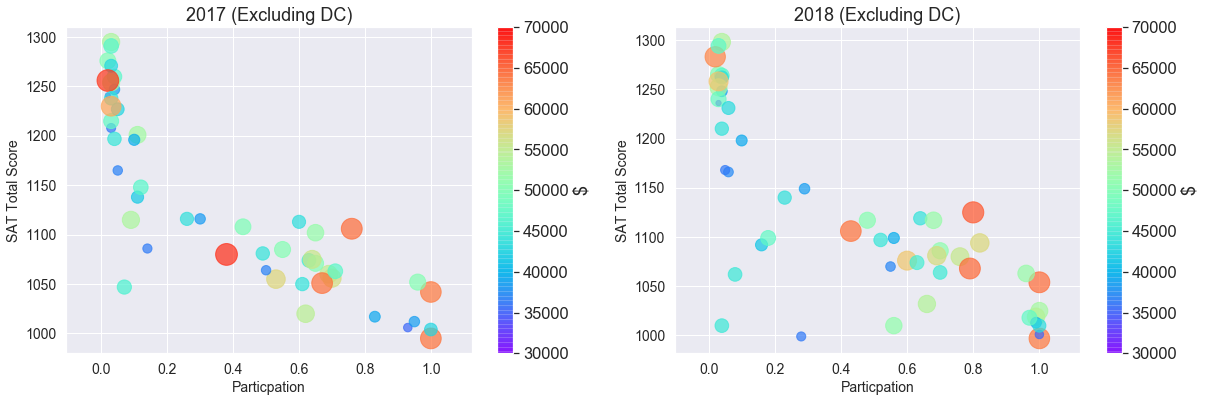

In [49]:
# Scatter plot of total scores vs. participation.
# The size of the circles represent the state GDP per Capita
# Data includes only all the 50 states, no DC.

df_noDC = df.drop([df.index[8], df.index[59]])

gdp_min = (df_noDC['gdp_per_capita'].min())-2000
gdp_max = (df_noDC['gdp_per_capita'].max())+2000

size_2017 = df_noDC[df_noDC['year']=='2017']['gdp_per_capita'].tolist()
size_2017 = [(val-gdp_min)/(gdp_max-gdp_min)*500 for val in size_2017]

size_2018 = df_noDC[df_noDC['year']=='2018']['gdp_per_capita'].tolist()
size_2018 = [(val-gdp_min)/(gdp_max-gdp_min)*500 for val in size_2018]

cm = plt.cm.get_cmap('rainbow')
fig, axs = plt.subplots(1, 2)
sc0 = axs[0].scatter(df_noDC[df_noDC['year']=='2017']['participation'].tolist(), df_noDC[df_noDC['year']=='2017']['total'].tolist(), \
               c = df_noDC[df_noDC['year']=='2017']['gdp_per_capita'], linewidths = 1, s = size_2017, alpha=.7, cmap=cm, \
               vmin = 30000, vmax =70000)

axs[0].set_xlabel("Particpation", fontsize=14)
axs[0].set_ylabel("SAT Total Score", fontsize=14)
axs[0].set_title('2017 (Excluding DC)', fontsize=18)
axs[0].tick_params(axis='x', labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)
fig.colorbar(sc0, ax=axs[0], label = '$')

sc1 = axs[1].scatter(df_noDC[df_noDC['year']=='2018']['participation'].tolist(), df_noDC[df_noDC['year']=='2018']['total'].tolist(), \
               c = df_noDC[df_noDC['year']=='2018']['gdp_per_capita'], linewidths = 1, s = size_2018, alpha=.7, cmap=cm, \
               vmin = 30000, vmax =70000)

axs[1].set_xlabel("Particpation", fontsize=14)
axs[1].set_ylabel("SAT Total Score", fontsize=14)
axs[1].set_title('2018 (Excluding DC)', fontsize=18)
axs[1].tick_params(axis='x', labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)
fig.colorbar(sc1, ax=axs[1], label = '$')


fig.set_figheight(6)
fig.set_figwidth(20)

**Findings:**
- These plots clearly shows that there is a negative correlation between participation and total score.
- No strong correlation between GDP per Capita vs participation or total score.

In [50]:
# import usa map using geopandas and create a layered map
usa = gpd.read_file('../Extra_data/Igismap/United_States-_States_Polygon.shp')
usa.sort_values('name', inplace=True)
usa.drop([usa.index[2], usa.index[12], usa.index[37], usa.index[42], usa.index[48]], inplace=True)
usa.reset_index(inplace=True)
usa.loc[:, 'participation_2017'] = df_2017.loc[:, 'Participation']
usa.loc[:, 'participation_2018'] = df_2018.loc[:, 'Participation']

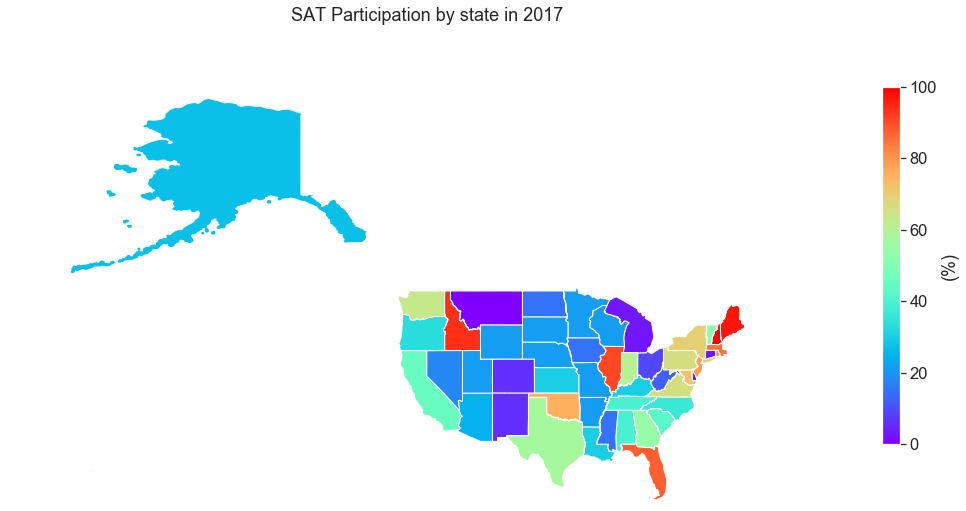

In [51]:
# Map of the 2017 SAT participation on top of the US geograph
usa.plot(cmap='rainbow', figsize=(16, 12), column='participation_2017')
plt.xlim((-190,-50))
plt.ylim((24,80))
plt.grid(False)
plt.axis('off')
cmap = 'rainbow'
norm = mpl.colors.Normalize(vmin=0, vmax=100)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), \
             orientation='vertical', label='(%)', fraction=0.02, pad=0.04)
plt.title('SAT Participation by state in 2017', fontsize=18);

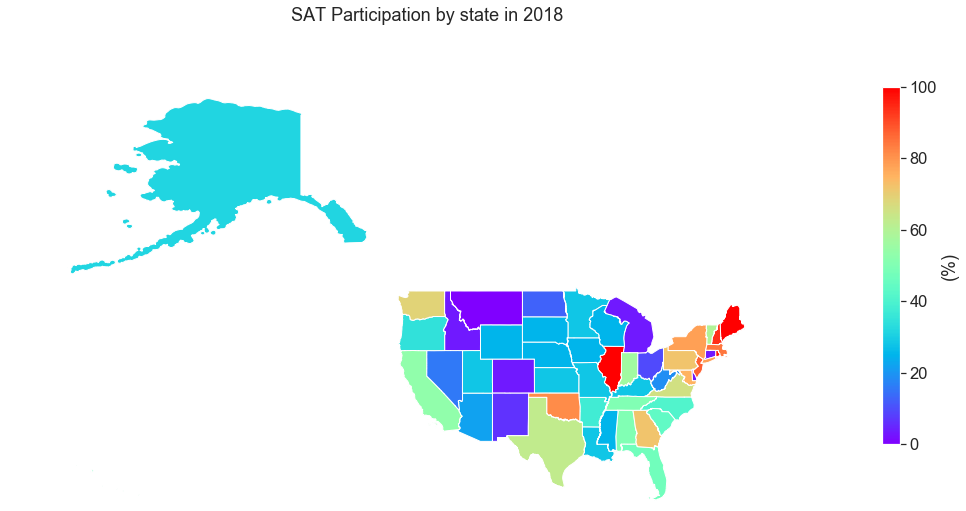

In [52]:
# Map of the 2018 SAT participation on top of the US geograph
usa.plot(cmap='rainbow', figsize=(16, 12), column='participation_2018')
plt.xlim((-190,-50))
plt.ylim((24,80))
plt.grid(False)
plt.axis('off')
cmap = 'rainbow'
norm = mpl.colors.Normalize(vmin=0, vmax=100)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), \
             orientation='vertical', label='(%)', fraction=0.02, pad=0.04)
plt.title('SAT Participation by state in 2018', fontsize=18);

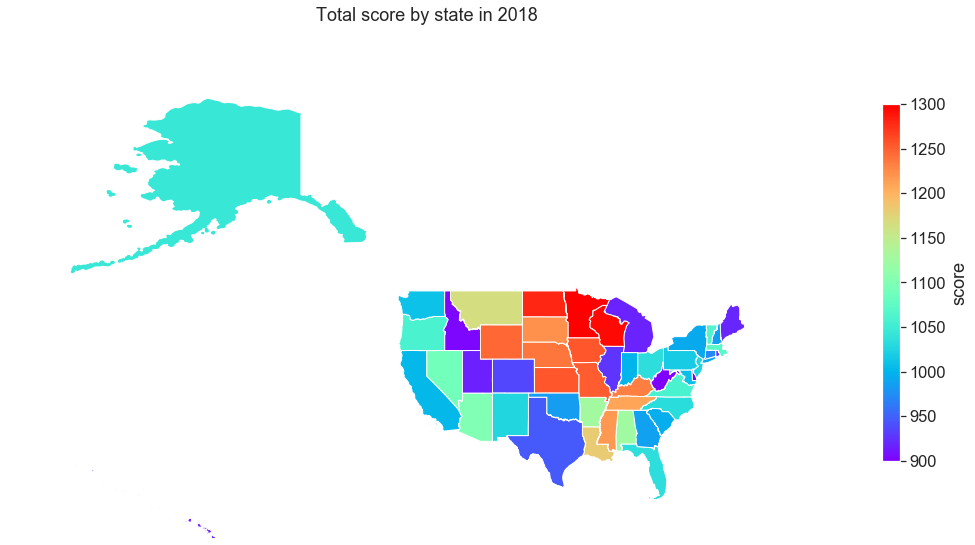

In [53]:
# Map of the 2018 SAT total score on top of the US geograph
usa.loc[:, 'total_2018'] = df_2018.loc[:, 'Total']
usa.drop([usa.index[8]]).plot(cmap='rainbow', figsize=(16, 12), column='total_2018')
plt.xlim((-190,-50))
plt.ylim((20,80))
plt.grid(False)
plt.axis('off')
cmap = 'rainbow'
norm = mpl.colors.Normalize(vmin=900, vmax=1300)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), \
             orientation='vertical', label='score', fraction=0.02, pad=0.04)
plt.title('Total score by state in 2018', fontsize=18);

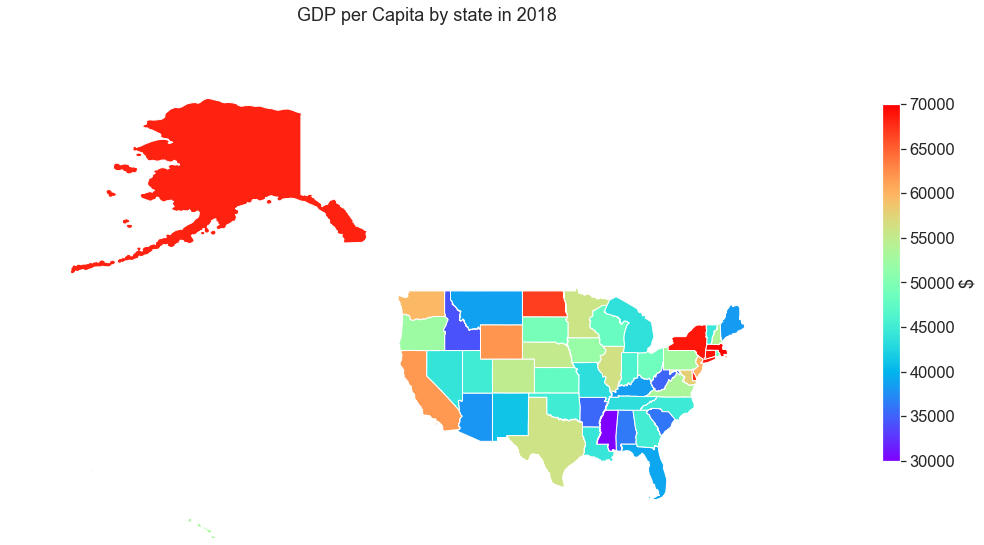

In [54]:
# Map of the 2018 GDP per Capita on top of the US geograph
usa.loc[:, 'gdppc_2018'] = df_2018.loc[:, 'GDP_per_Capita']
usa.drop([usa.index[8]]).plot(cmap='rainbow', figsize=(16, 12), column='gdppc_2018')
plt.xlim((-190,-50))
plt.ylim((20,80))
plt.grid(False)
plt.axis('off')
cmap = 'rainbow'
norm = mpl.colors.Normalize(vmin=30000, vmax=70000)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), \
             orientation='vertical', label='$', fraction=0.02, pad=0.04)
plt.title('GDP per Capita by state in 2018', fontsize=18);

**Findings:**
- SAT is a more popular exam in east and west coasts of United States. This is either mostly because of state mandate or free SAT review programs provided by schools. 
- A more controversial and less accepted argument is that elite colleges in those states prefer SAT over the ACT; however, there is not enough data in this study to support this argument.

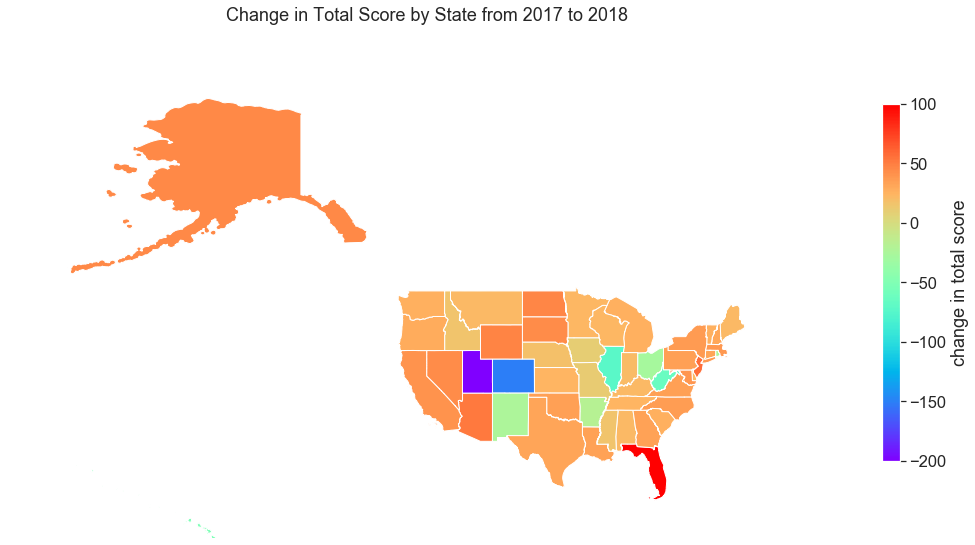

In [55]:
# Map of change in total scores from 2017 to 2018 on top of the US geograph
dict_total = {'Change in total scores':[b-a for (a,b) in zip(df[df['year']=='2017']\
                                                             ['total'],df[df['year']=='2018']['total'])]}
usa_test = usa.copy()
usa_test.drop([usa_test.index[8]], inplace=True)

usa_test.loc[:, 'Change in total scores'] = pd.DataFrame.from_dict(dict_total)
usa_test.plot(cmap='rainbow', figsize=(16, 12), column='Change in total scores')
plt.xlim((-190,-50))
plt.ylim((20,80))
plt.grid(False)
plt.axis('off')
cmap = 'rainbow'
norm = mpl.colors.Normalize(vmin=-200, vmax=100)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), \
             orientation='vertical', label='change in total score', fraction=0.02, pad=0.04)
plt.title('Change in Total Score by State from 2017 to 2018', fontsize=18);

**Findings:**
- Florida saw the most increase in scores from 2017 to 2018.
- Utah saw the lowest drop in scores from 2017 to 2018.

## Conclusions and Recommendations

<div align='justify'> 
    
SAT is a standardized test widely used for college admissions in the United States. The test consists of reading, writing, and math categories with a total score range of 400-1600. This analysis investigates the SAT exam data by state for a period of two years, from 2016-2017 to 2017-2018, to answer the question: Do states with an SAT requirement report lower than average scores than states that encourage the ACT? <br> The SAT and ACT are standardized tests, yet they are different. For example, students cannot use a calculator while taking the SAT where they can in the ACT. As a result, students who are better in abstract math and mental calculations are more comfortable taking the SAT over the ACT. The time required to finish the SAT is slightly longer than the ACT, so students who prefer having more time during the exam are usually more interested in taking the SAT.<br> Published data indicates that the SAT is more popular in the east and west coasts, where there are more private schools and the ACT is more popular in the Midwest, where there are more publics schools. Students who do take the SAT in the Midwest, where participation is historically very low, score substantially higher than the national average score. For example, the state of Minnesota (where their average scores for 2017 and 2018 are 1298 and 1295, 172 and 175 points above the national average) sees one of lowest SAT participation in the nation. These high scores and low participation numbers indicate that only students who are well prepared take the SAT in Minnesota. <br> Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, and West Virginia are the states where the SAT is preferred for high school graduation. Participations in these states are close to 100%, except in West Virginia. If the participations for some of these states are not exactly 100%, it can be related to either inaccurate count of seniors in those states, or not having a state mandate to take the exam for the full school year. The most significant outlier between these states is West Virginia where the state prefers the SAT, but participation was 14% and 28% in 2017 and 2018, respectively. This state also reports lower than average scores in both years by 40 and 121 points, respectively. West Virginia has lower number of schools, school districts and students than most other states in nation. In West Virginia, the number of students who attend rural schools are significantly higher than students who attend suburban schools. In 2012-2013, 65.5% of students in West Virginia attended rural schools or town schools. In addition, the number of teacher vacancies in West Virginia more than doubled between 2013 and 2017. These can be some of the contributing factors why participation in West Virginia is lower than other states that prefer the SAT. <br> Another interesting observation can be found in Illinois. Illinois saw student participation jump 90% from 2016-2017 to 2017-2018. This substantial change is the result of a key decision made by the Illinois College Board in 2016-2017 school year. The college board made the SAT exam mandatory for all Illinois high schoolers, leading to the substantial jump in participation. <br> Florida saw the highest increase in total scores from 2017 to 2018 by 82 points. Students in Florida scored better in both math and reading/writing, but the state average score was lower than the national average. The increase in scores can be related to the free SAT school day events, where students have the opportunity to take the exam for free during school hours. The state collaboration with Khan Academy to provide free, online SAT review lessons and practice tests is also a key factor for this increase. <br> The SAT data by state show that participation has a strong negative correlation with total score. The states that require SAT see significantly higher participation, but these states report scores lower than national average. <br> The map of participation by state shows that this exam is more popular in east and west coasts than Midwest. A less accepted and mostly rejected argument between students and their families is that elite colleges in east and west coasts prefer SAT over the ACT; however, there is not enough data in this study to support this argument. A more accepted argument is that those states either require SAT for graduation or offer free SAT prep materials or review lessons to their students. These incentives could include covering the exam cost, free SAT school day events, or collaboration with online educational platforms like Khan Academy to provide free, online SAT review lessons and practice tests. <br> In conclusion, state participation in the SAT exam is a strong function of the state college board decisions to ask for the SAT or the ACT. Data shows that states where the college board require the SAT exam see higher participation but lower average scores. Most of these states cover the exam fee and offer school day programs to their high schoolers, so the students don't need to take the exam on weekends. However, these states do not have high average total scores in nation, since all the students in the states regardless of their level of preparedness need to take the exam for high school graduation. The students from states with low participation usually score substantially higher than the national average. These students are usually more prepared than the average students in their state or other states. So, the average total scores in these states are substantially higher. A general recommendation to improve average scores by state is to offer free SAT school day events, cover exam costs, and collaborate with online educational platforms like Khan Academy or Coursera to provide free, online SAT review lessons and practice tests.

</div>

## References

For more information, please check the following websites:
- [List of States that Require the SAT](https://blog.collegevine.com/states-that-require-sat/)
- [List of States that Require the ACT](https://blog.collegevine.com/states-that-require-the-act/)
- [States That Provide A Free ACT/ SAT 
Test](https://www.collegeraptor.com/getting-in/articles/act-sat/states-act-sat-given-free/)
- [List of U.S. states and territories by GDP per capita](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP_per_capita)
- [Illinois Changed to the SAT in 2017: What You Need to Know](https://www.testive.com/illinois/)
- [SAT and ACT Scores for Admission to Four-Year Vermont Colleges](https://www.thoughtco.com/sat-scores-four-year-vermont-colleges-788768)
- [Public education in West Virginia](https://ballotpedia.org/Public_education_in_West_Virginia)
- [Schools in poor, rural districts are the hardest hit by nation's growing teacher shortage](https://www.apmreports.org/story/2017/08/28/rural-schools-teacher-shortage)
- [SAT, ACT: Florida students lag behind national averages](https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html)
- [The Story Behind the SAT Overhaul](https://www.nytimes.com/2014/03/09/magazine/the-story-behind-the-sat-overhaul.html)

